**CHECK DATA FROM EXCEL FILE**

In [ ]:
import pandas as pd

# นำเข้าข้อมูลจากไฟล์ excel
df = pd.read_excel('processed_villa_data_01.xlsx')

# ตรวจสอบข้อมูล
print(df.head())


           Search date         checkin date           Pool Villa Name  Agoda  \
0  2567-09-16 00:00:00  2567-09-17 00:00:00      Rice Villa ChiangMai  16023   
1  2567-09-16 00:00:00  2567-09-17 00:00:00     Santhiya Phuket Natai   8266   
2  2567-09-17 00:00:00  2567-09-18 00:00:00        Wings Villa Phuket   3771   
3  2567-09-17 00:00:00  2567-09-18 00:00:00  Oscar Villa Aonang Krabi   2378   
4  2567-09-18 00:00:00  2567-09-19 00:00:00      Annie Villa Khao Yai   8519   

   Traveloka   Trip  
0      16403  14733  
1      16446  13105  
2       4824   3864  
3       3248   3335  
4      12283  12287  


**Data Exploration**
The 2nd deliverable is an exploratory data analysis.  Use excel or python or R to plot the price histogram (5 bins) for each OTA with statistical parameters (mean and standard deviation)

Scoring (Full score: 10):

2 points will be given for no missing subplot title

2 points will be given for the same scaling on x-axis
2 points will be given for the same scaling on y-axis

2 points (one each) will be given for correctly reported statistical parameters (mean and standard deviation)

2 points will be given for correctly plot the histogram (5 bins)

Anything not comply to the scoring scheme will result in zero score


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

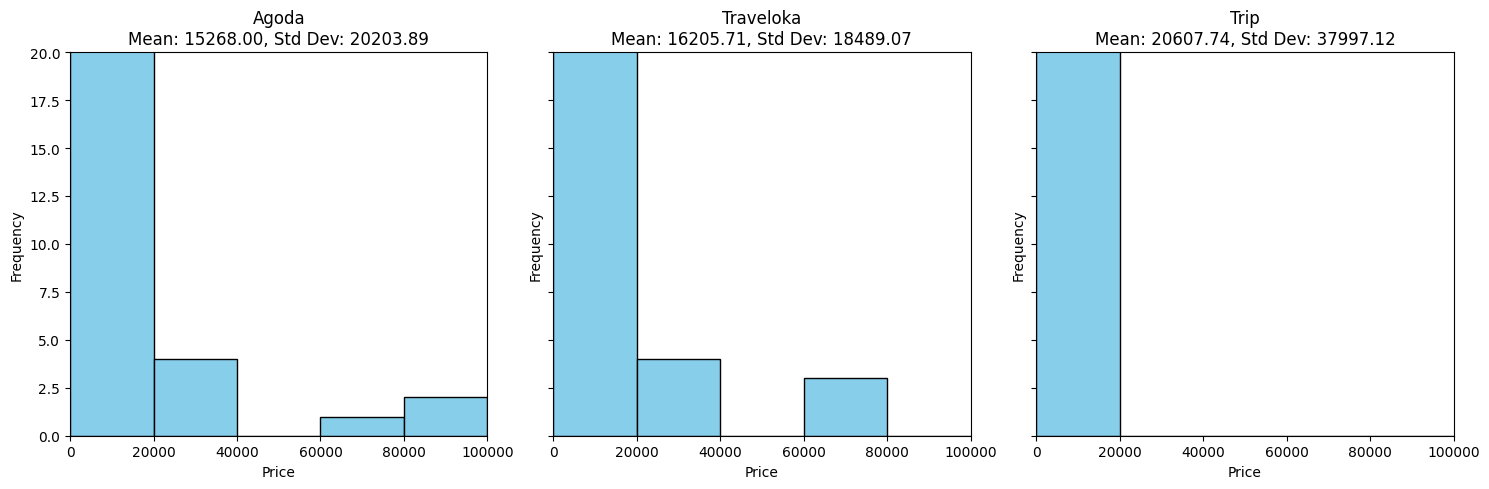

In [ ]:
# แปลงประเภทข้อมูลของคอลัมน์ราคาทั้งหมดเป็นตัวเลข
df['Agoda'] = pd.to_numeric(df['Agoda'], errors='coerce')
df['Traveloka'] = pd.to_numeric(df['Traveloka'], errors='coerce')
df['Trip'] = pd.to_numeric(df['Trip'], errors='coerce')

# ฟังก์ชันคำนวณค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐาน
def calculate_stats(prices):
    mean = np.mean(prices)
    std_dev = np.std(prices)
    return mean, std_dev

# กำหนดช่วงของ bins
bins = [0, 20000, 40000, 60000, 80000, 100000]

# สร้าง subplot histogram (5 bins)
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)

# ใช้ชื่อคอลัมน์ของ DataFrame สำหรับ OTA
ota_names = ['Agoda', 'Traveloka', 'Trip']

for i, ota in enumerate(ota_names):
    prices = df[ota].dropna()  # กรองค่า NaN
    axs[i].hist(prices, bins=bins, color='skyblue', edgecolor='black')
    mean, std_dev = calculate_stats(prices)
    axs[i].set_title(f'{ota}\nMean: {mean:.2f}, Std Dev: {std_dev:.2f}')
    axs[i].set_xlabel('Price')
    axs[i].set_ylabel('Frequency')

# ตั้งค่าสเกลแกน x และ y ให้เหมือนกัน
plt.xlim(0, 100000)  # ตั้งค่าขอบเขต x-axis ให้ตรงกับช่วงที่กำหนด
plt.ylim(0, 20)  # กำหนดค่า Y ให้อยู่ในช่วงที่ต้องการ

# แสดงกราฟ
plt.tight_layout()
plt.show()


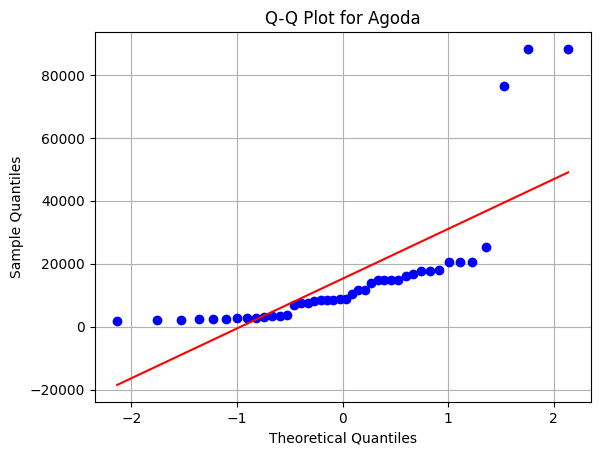

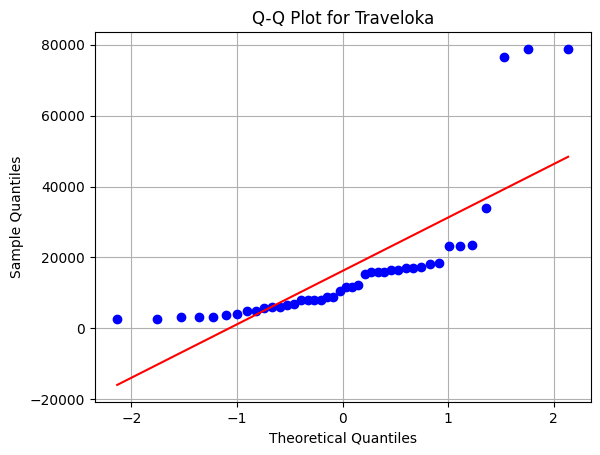

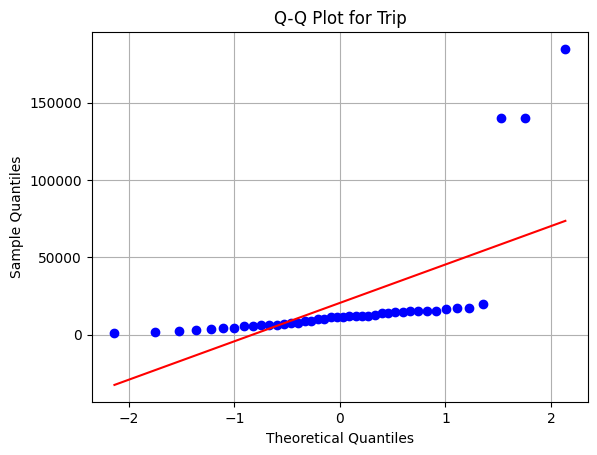

In [ ]:
import scipy.stats as stats

# แปลงประเภทข้อมูลของคอลัมน์ราคาทั้งหมดเป็นตัวเลข
df['Agoda'] = pd.to_numeric(df['Agoda'], errors='coerce')
df['Traveloka'] = pd.to_numeric(df['Traveloka'], errors='coerce')
df['Trip'] = pd.to_numeric(df['Trip'], errors='coerce')

# ฟังก์ชันสำหรับสร้าง Q-Q Plot
def qq_plot(data, title):
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(title)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.grid()
    plt.show()

# สร้าง Q-Q Plot สำหรับแต่ละ OTA
for ota in ['Agoda', 'Traveloka', 'Trip']:
    prices = df[ota].dropna()
    qq_plot(prices, f'Q-Q Plot for {ota}')


Empty DataFrame
Columns: [Search date, checkin date, Pool Villa Name, Agoda, Traveloka, Trip]
Index: []


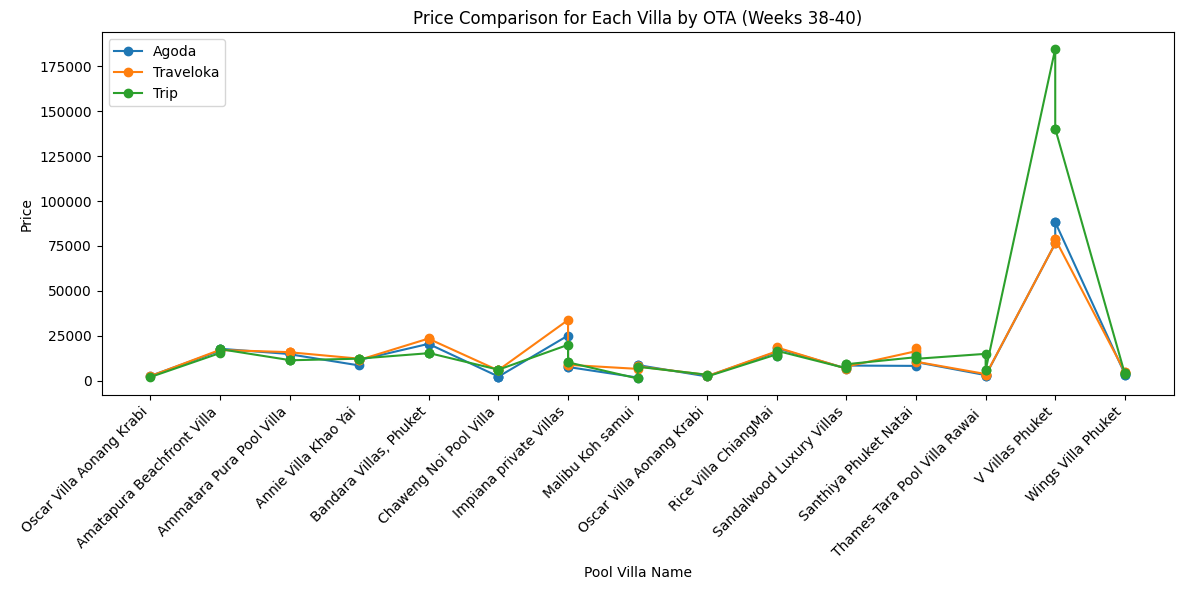

In [ ]:
# แปลงคอลัมน์วันที่เป็นข้อความ
df['Search date'] = df['Search date'].astype(str)

# แปลงปี พ.ศ. เป็น ค.ศ.
df['Search date'] = df['Search date'].str.replace('2567', '2024')  # แปลง พ.ศ. 2567 เป็น ค.ศ. 2024

# แปลงคอลัมน์วันที่เป็นวันที่
df['Search date'] = pd.to_datetime(df['Search date'], errors='coerce')

# ตรวจสอบว่ามีวันที่ที่ไม่สามารถแปลงได้หรือไม่
print(df[df['Search date'].isnull()])

# สร้างคอลัมน์ใหม่สำหรับปี
df['Year'] = df['Search date'].dt.year

# สร้างคอลัมน์ใหม่สำหรับสัปดาห์
df['Week'] = df['Search date'].dt.isocalendar().week

# สร้างคอลัมน์ใหม่สำหรับปี-สัปดาห์
df['Year-Week'] = df['Year'].astype(str) + '-W' + df['Week'].astype(str)

# สร้าง DataFrame ใหม่สำหรับราคาจากแต่ละ OTA โดยการเฉลี่ยราคาตาม Pool Villa และ Year-Week
price_comparison = df.groupby(['Pool Villa Name', 'Year-Week'])[['Agoda', 'Traveloka', 'Trip']].mean().reset_index()

# แสดงราคาสำหรับแต่ละที่พักในสัปดาห์ที่ 38, 39, และ 40
weeks_to_compare = price_comparison[price_comparison['Year-Week'].isin(['2024-W38', '2024-W39', '2024-W40'])]

# สร้างกราฟเปรียบเทียบราคาสำหรับแต่ละที่พัก
plt.figure(figsize=(12, 6))
for ota in ['Agoda', 'Traveloka', 'Trip']:
    plt.plot(weeks_to_compare['Pool Villa Name'], weeks_to_compare[ota], marker='o', label=ota)

plt.title('Price Comparison for Each Villa by OTA (Weeks 38-40)')
plt.xlabel('Pool Villa Name')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
print(weeks_to_compare)

                  Pool Villa Name Year-Week    Agoda  Traveloka      Trip
0        Oscar Villa Aonang Krabi  2024-W40   2688.0     2586.0    2088.0
1      Amatapura Beachfront Villa  2024-W38  16737.0    17194.0   15425.0
2      Amatapura Beachfront Villa  2024-W39  17757.0    17113.0   17607.0
3      Amatapura Beachfront Villa  2024-W40  17812.0    17108.0   17598.0
4        Ammatara Pura Pool Villa  2024-W38  14869.0    15924.0   11494.0
5        Ammatara Pura Pool Villa  2024-W39  14741.0    15863.0   11396.0
6        Ammatara Pura Pool Villa  2024-W40  14745.0    15857.0   11387.0
7            Annie Villa Khao Yai  2024-W38   8519.0    12283.0   12287.0
8            Annie Villa Khao Yai  2024-W39  11552.0    11608.0   12282.0
9            Annie Villa Khao Yai  2024-W40  11552.0    11584.0   12324.0
10         Bandara Villas, Phuket  2024-W38  20569.0    23535.0   15342.0
11         Bandara Villas, Phuket  2024-W39  20480.0    23320.0   15424.0
12         Bandara Villas, Phuket  202

datetime64[ns]


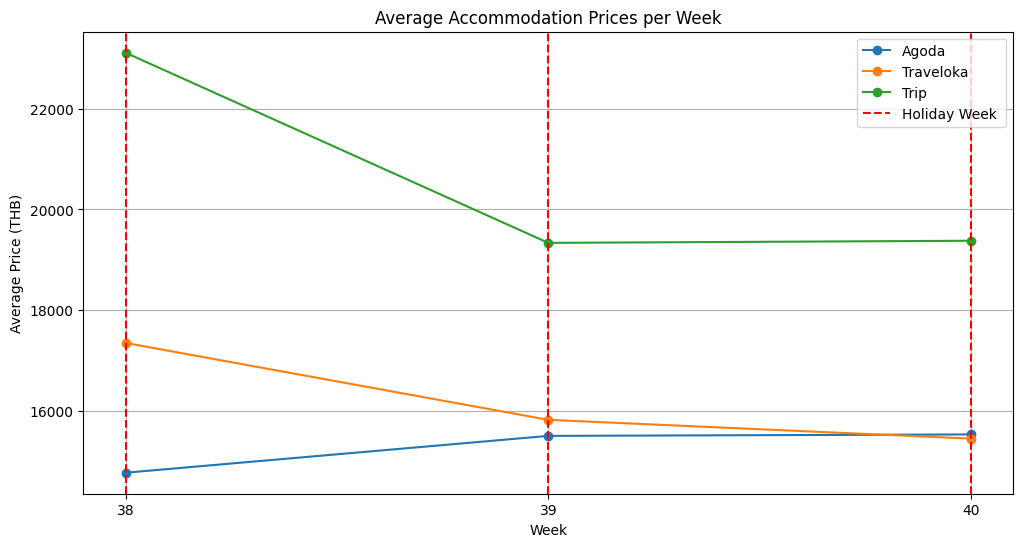

Week 38 Average Prices:
   Week         Agoda  Traveloka          Trip
0    38  14770.857143    17348.0  23111.071429
Week 39 Average Prices:
   Week         Agoda     Traveloka     Trip
1    39  15502.214286  15821.071429  19335.0
Week 40 Average Prices:
   Week         Agoda     Traveloka          Trip
2    40  15530.928571  15448.071429  19377.142857


In [ ]:
# ตรวจสอบประเภทข้อมูลของคอลัมน์ 'Search date'
print(df['Search date'].dtype)

# แปลงปี พ.ศ. เป็น ค.ศ. (ปรับแก้ตามปีที่ถูกต้อง)
df['Search date'] = df['Search date'].astype(str).str.replace('2567', '2024')

# แปลงคอลัมน์วันที่เป็นวันที่
df['Search date'] = pd.to_datetime(df['Search date'], errors='coerce')  # ใช้ errors='coerce' เพื่อจัดการกับค่าที่ไม่สามารถแปลงได้

# สร้างคอลัมน์ใหม่สำหรับสัปดาห์
df['Week'] = df['Search date'].dt.isocalendar().week

# สร้าง DataFrame ใหม่สำหรับราคาจากแต่ละ OTA
price_comparison = df.groupby(['Pool Villa Name', 'Week'])[['Agoda', 'Traveloka', 'Trip']].mean().reset_index()

# คำนวณราคาเฉลี่ยสำหรับแต่ละสัปดาห์
weekly_average = price_comparison.groupby('Week')[['Agoda', 'Traveloka', 'Trip']].mean().reset_index()

# กำหนดสัปดาห์ที่มีวันหยุด (เช่น สัปดาห์ที่ 38, 39, 40)
holidays = [38, 39, 40]

# สร้างกราฟ
plt.figure(figsize=(12, 6))
plt.plot(weekly_average['Week'], weekly_average['Agoda'], marker='o', label='Agoda')
plt.plot(weekly_average['Week'], weekly_average['Traveloka'], marker='o', label='Traveloka')
plt.plot(weekly_average['Week'], weekly_average['Trip'], marker='o', label='Trip')

# เน้นสัปดาห์ที่มีวันหยุด
for week in holidays:
    plt.axvline(x=week, color='red', linestyle='--', label=f'Holiday Week ' if week == holidays[0] else "")

# ตั้งค่าชื่อกราฟ
plt.title('Average Accommodation Prices per Week')
plt.xlabel('Week')
plt.ylabel('Average Price (THB)')
plt.xticks(weekly_average['Week'])
plt.legend()
plt.grid()

# แสดงกราฟ
plt.show()

# สรุปข้อมูลราคาในสัปดาห์ที่สำคัญ
for week in holidays:
    print(f"Week {week} Average Prices:")
    week_data = weekly_average[weekly_average['Week'] == week]
    print(week_data)


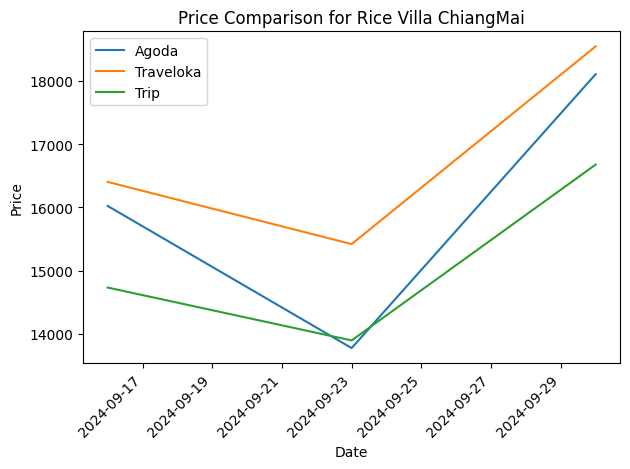

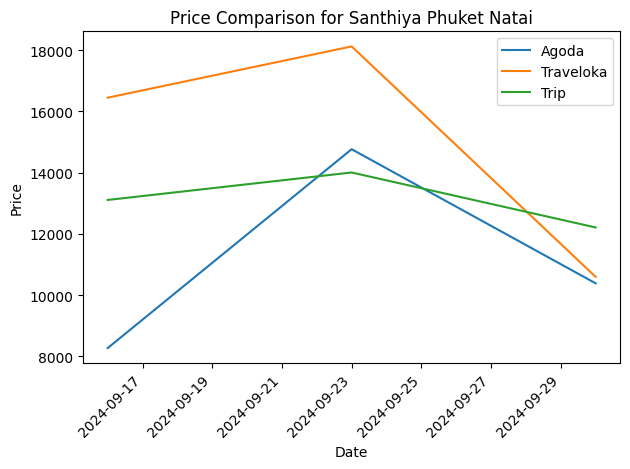

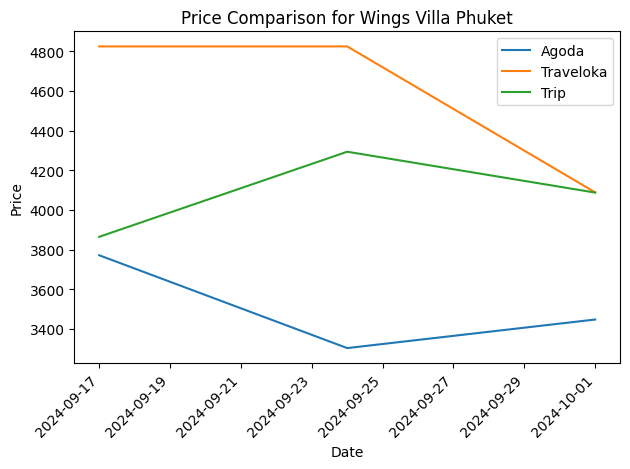

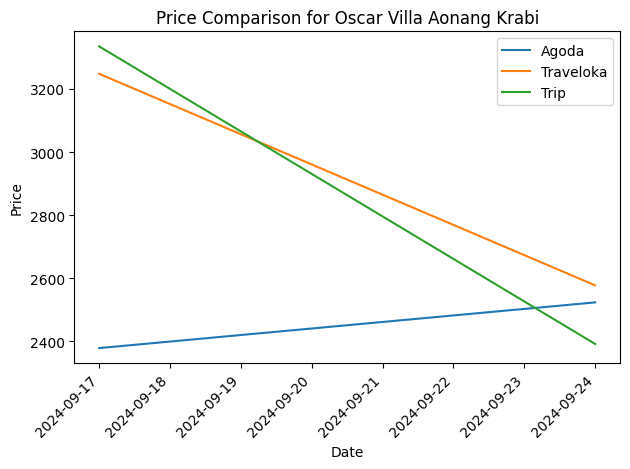

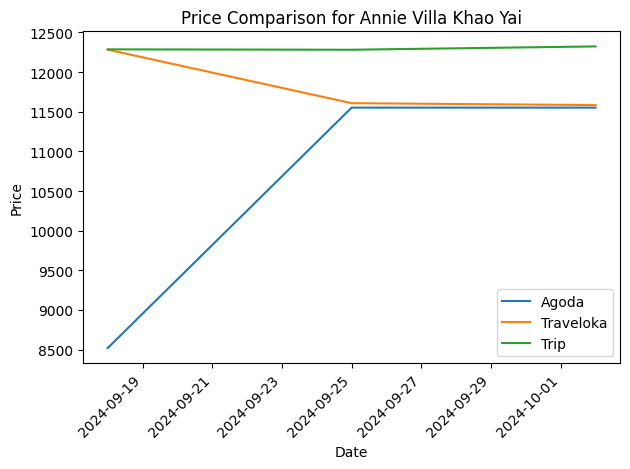

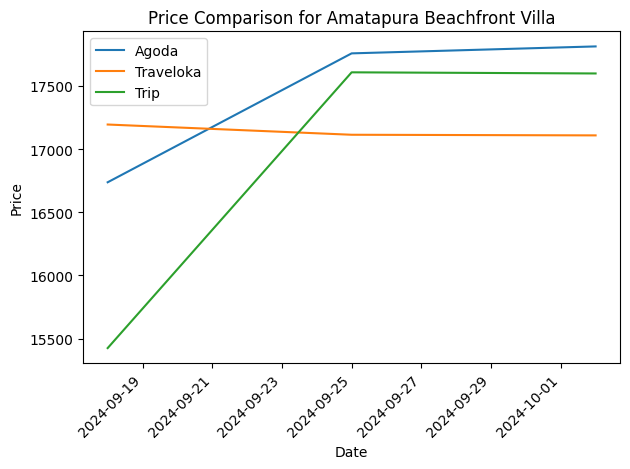

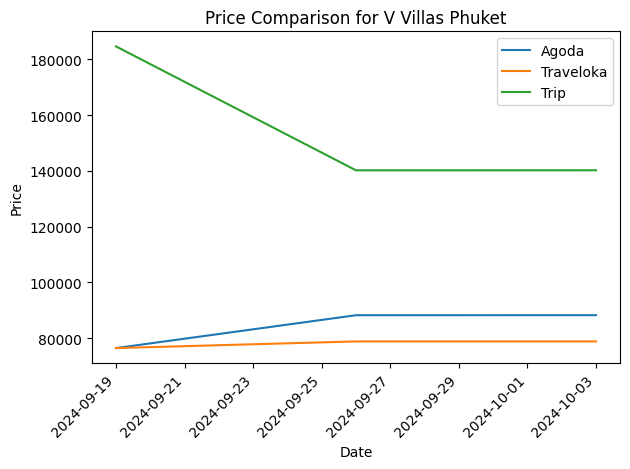

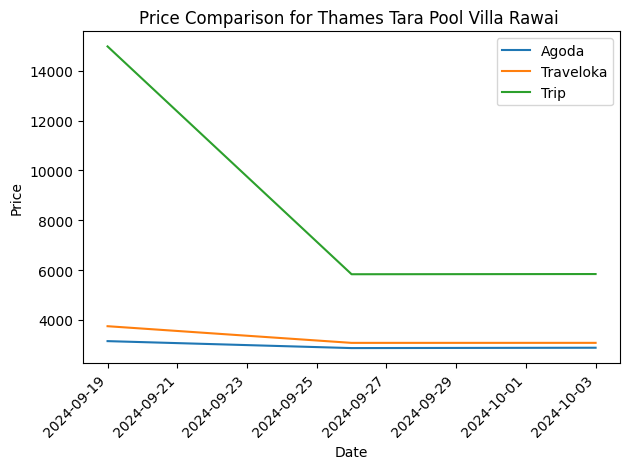

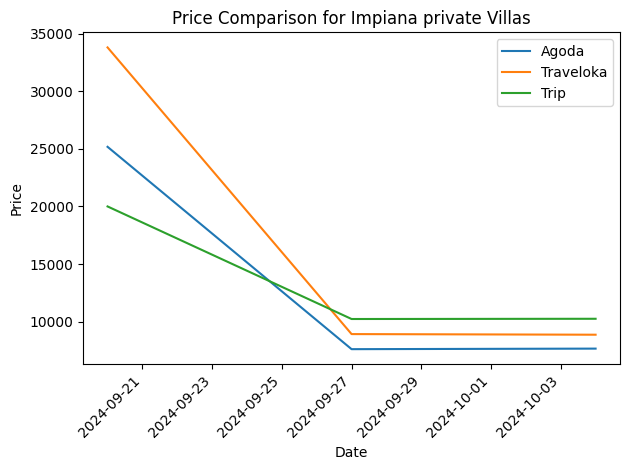

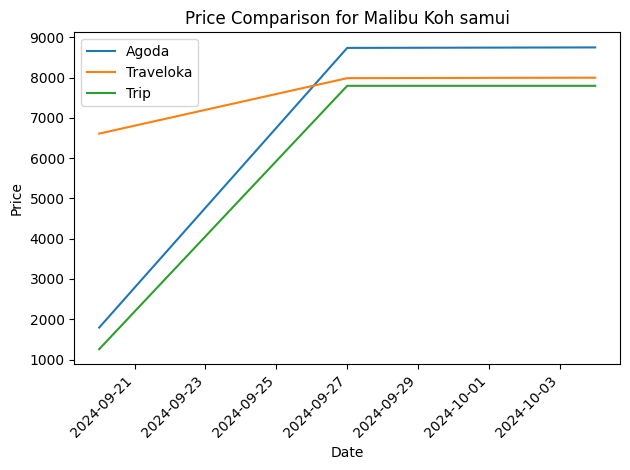

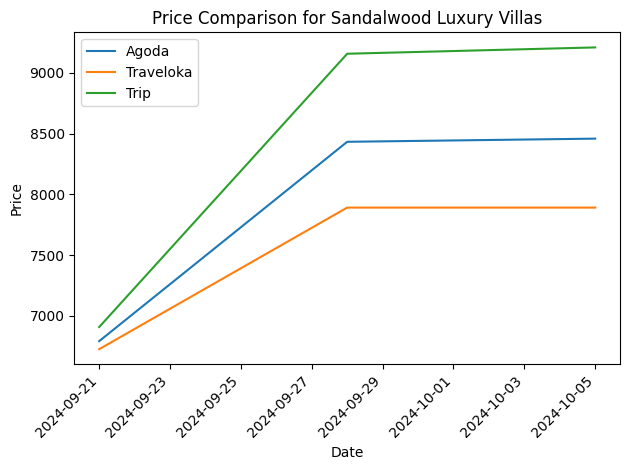

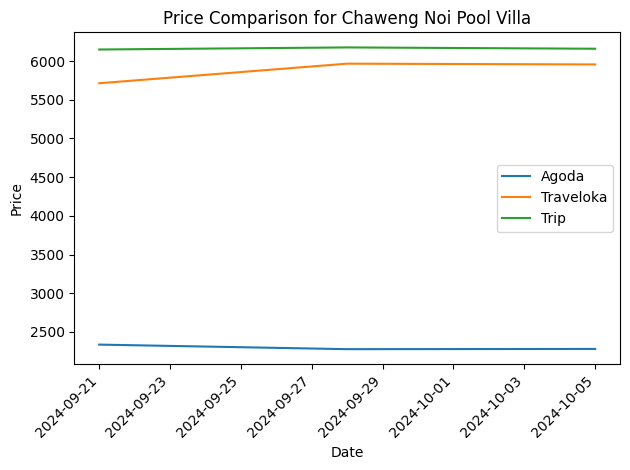

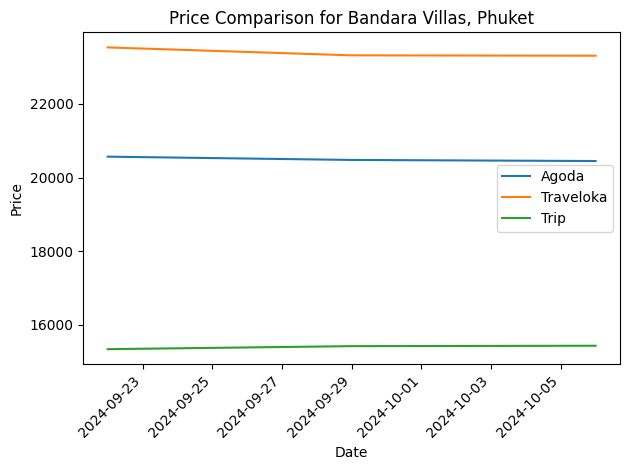

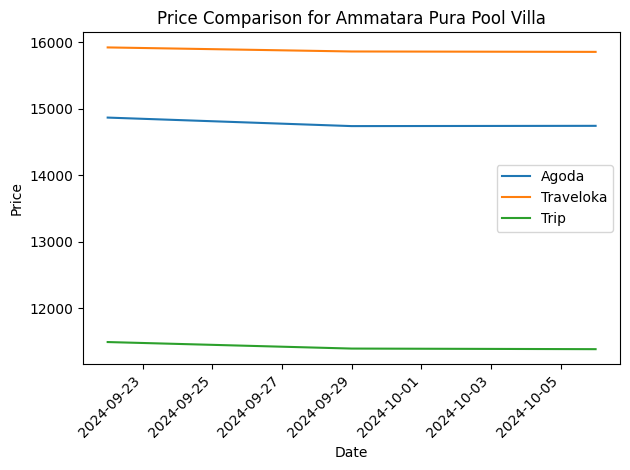

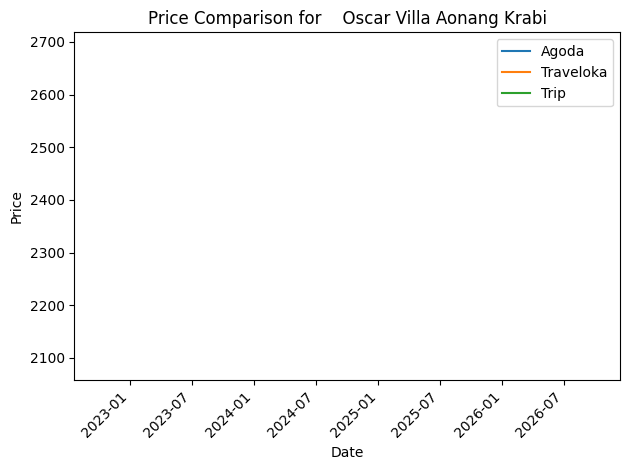

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# นำเข้าข้อมูลจากไฟล์
df = pd.read_excel('processed_villa_data_01.xlsx')

# แปลงคอลัมน์ที่จำเป็นให้เป็น datetime และ numeric
df['Search date'] = df['Search date'].apply(lambda x: x.replace(year=x.year - 543) if pd.notnull(x) else x)
df['Search date'] = pd.to_datetime(df['Search date'])
df['Agoda'] = pd.to_numeric(df['Agoda'], errors='coerce')
df['Traveloka'] = pd.to_numeric(df['Traveloka'], errors='coerce')
df['Trip'] = pd.to_numeric(df['Trip'], errors='coerce')

# สร้างกราฟเปรียบเทียบราคาในแต่ละสัปดาห์
for villa in df['Pool Villa Name'].unique():
    subset = df[df['Pool Villa Name'] == villa]
    plt.plot(subset['Search date'], subset['Agoda'], label='Agoda')
    plt.plot(subset['Search date'], subset['Traveloka'], label='Traveloka')
    plt.plot(subset['Search date'], subset['Trip'], label='Trip')
    plt.title(f'Price Comparison for {villa}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

    # ปรับค่าที่แสดงในแกน X เพื่อไม่ให้ทับกัน
    plt.xticks(rotation=45, ha='right')  # หมุนวันที่ 45 องศา และจัดแนวทางขวา

    plt.tight_layout()  # ปรับระยะห่างให้เหมาะสม
    plt.show()


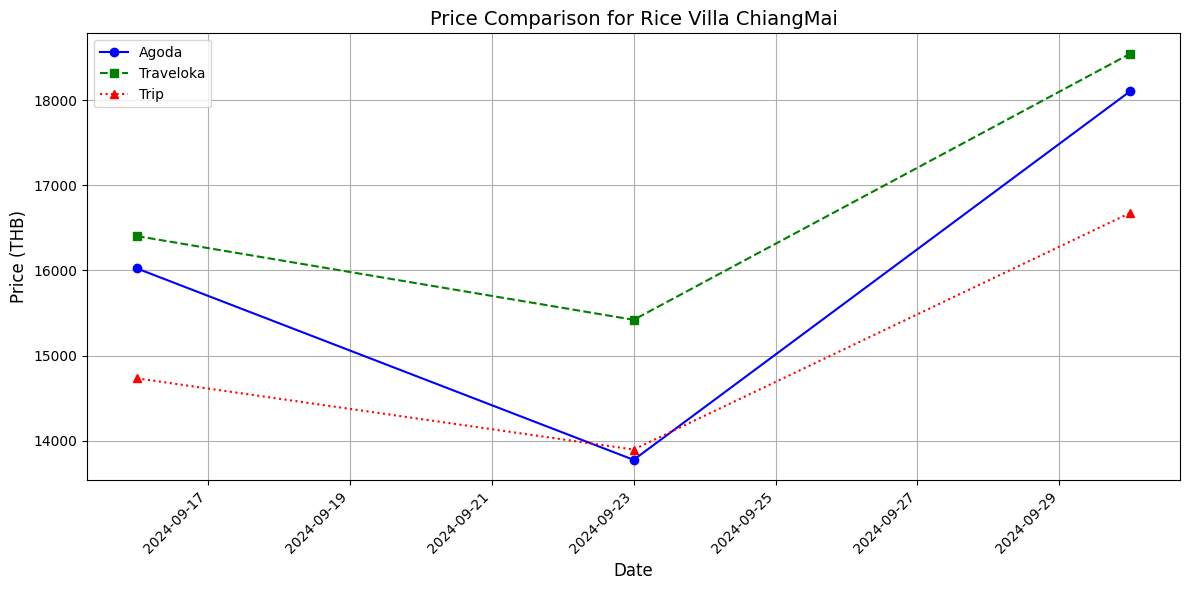

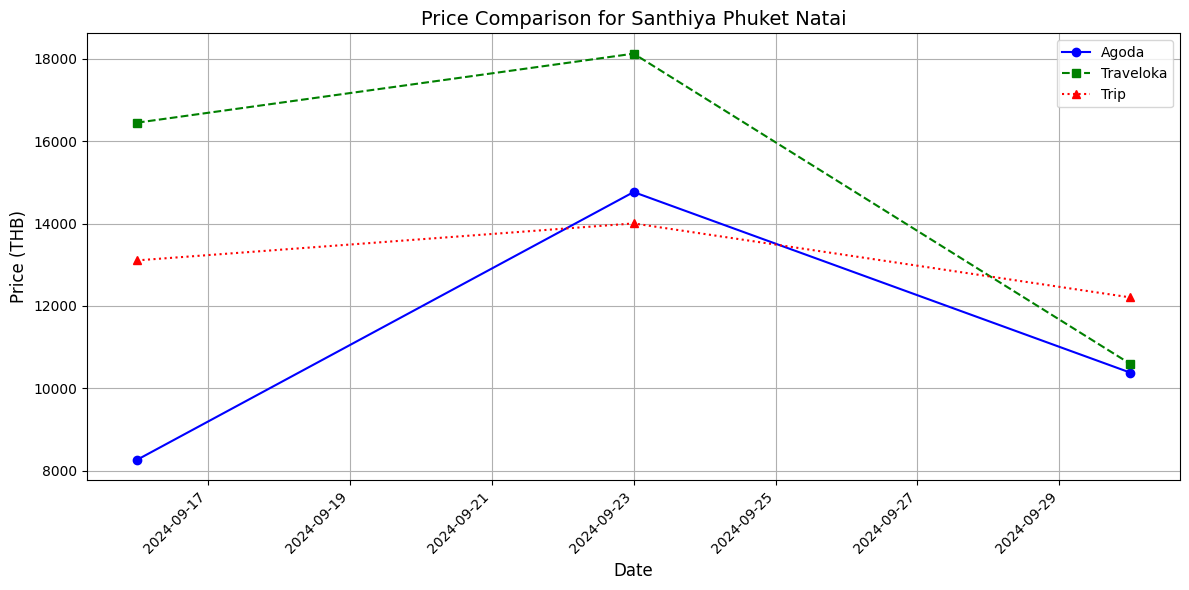

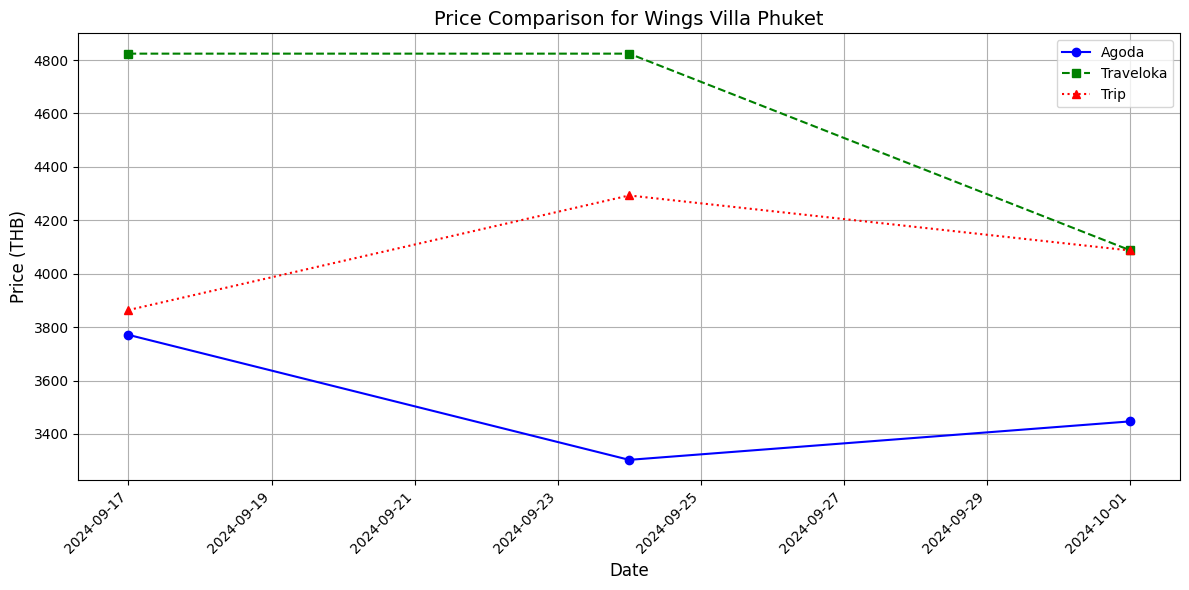

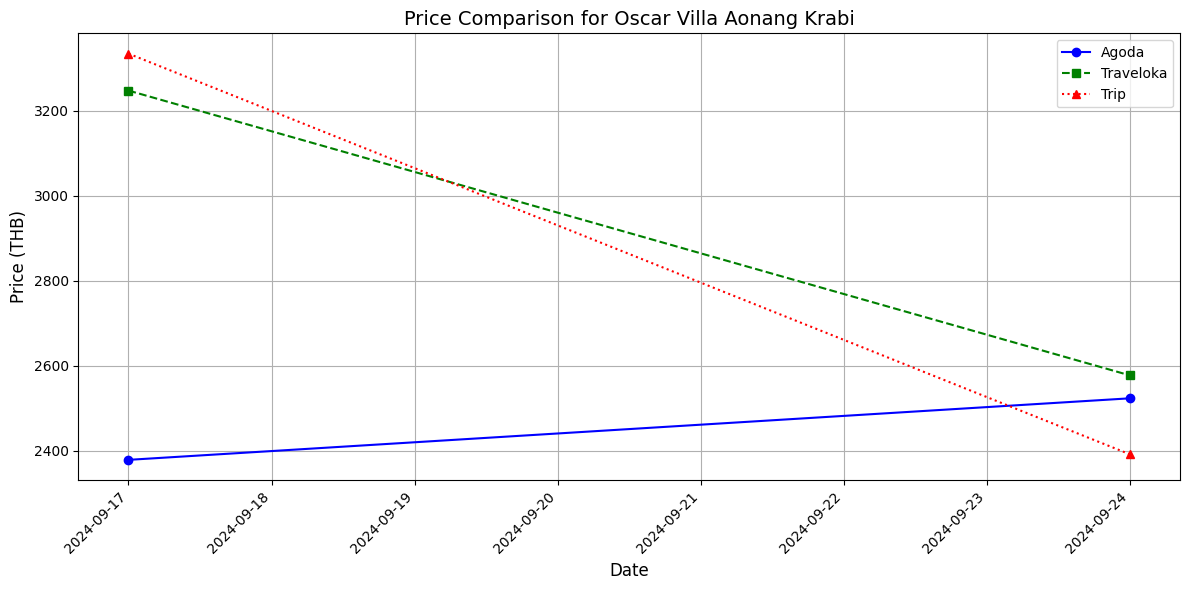

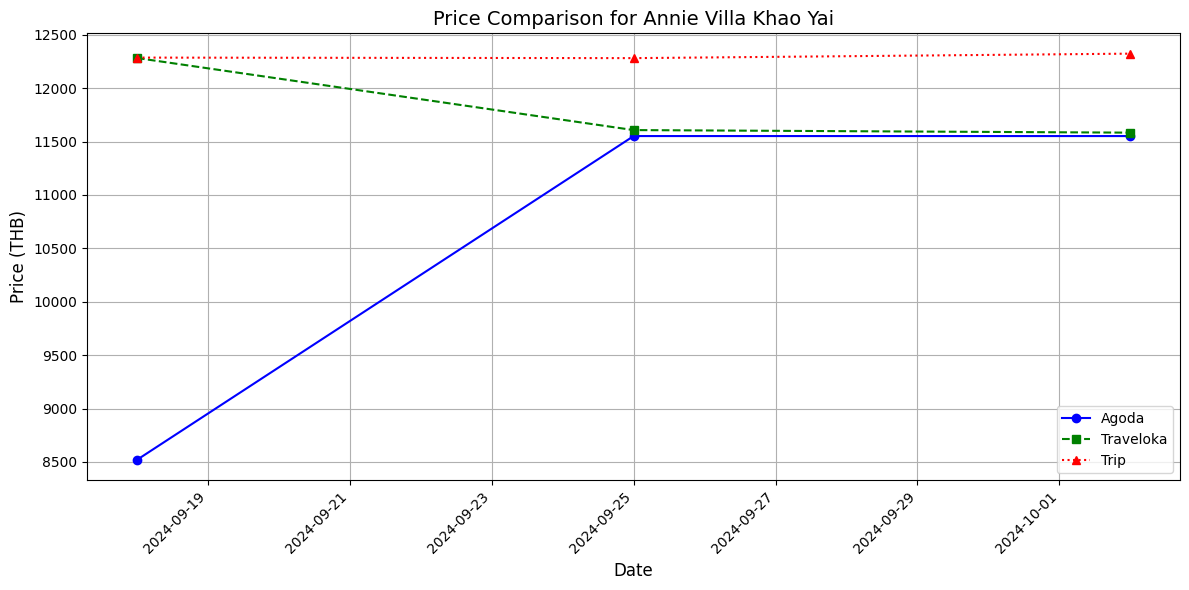

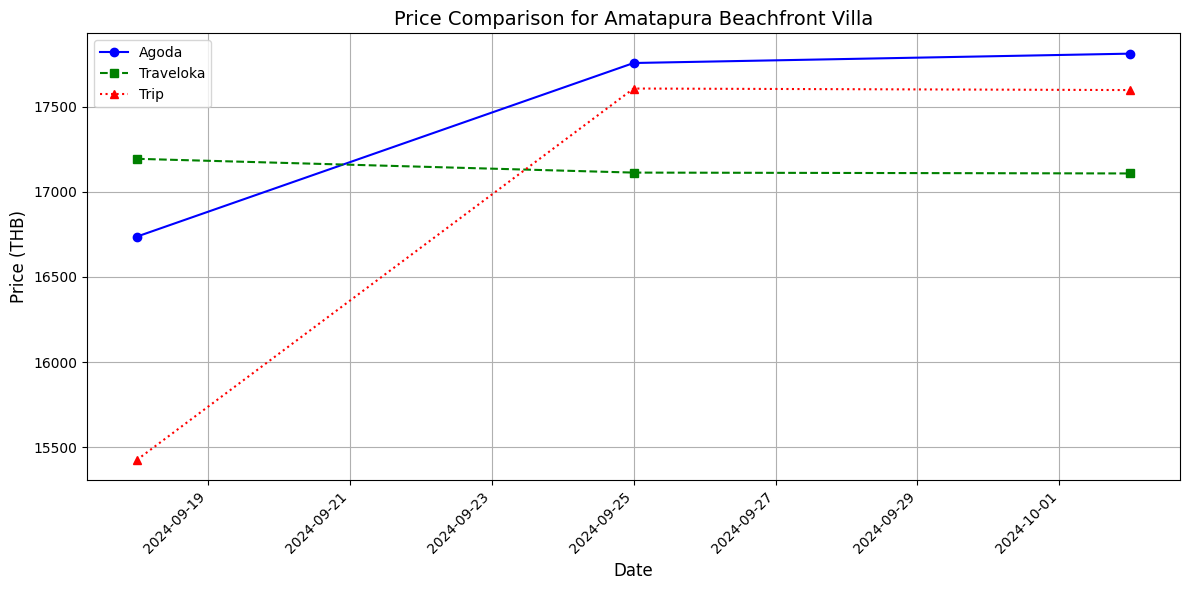

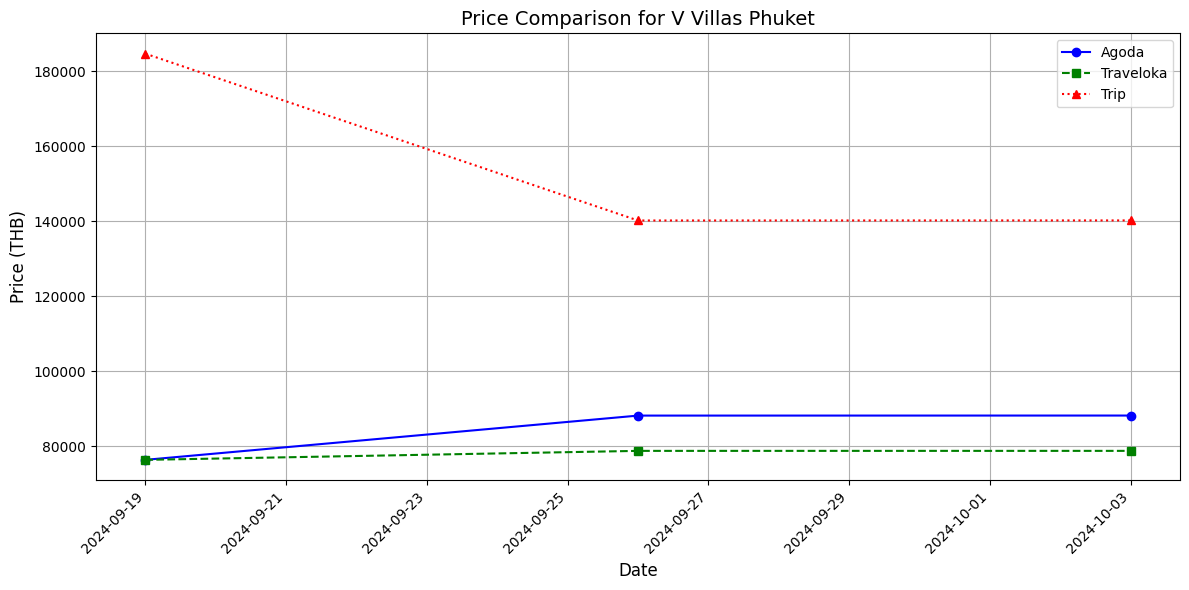

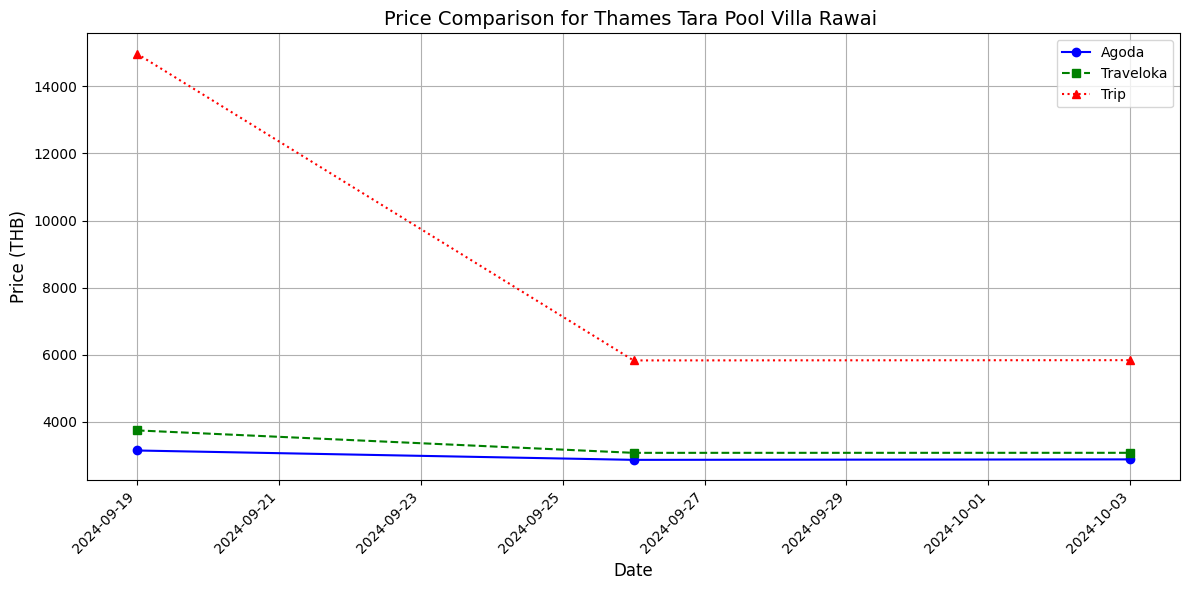

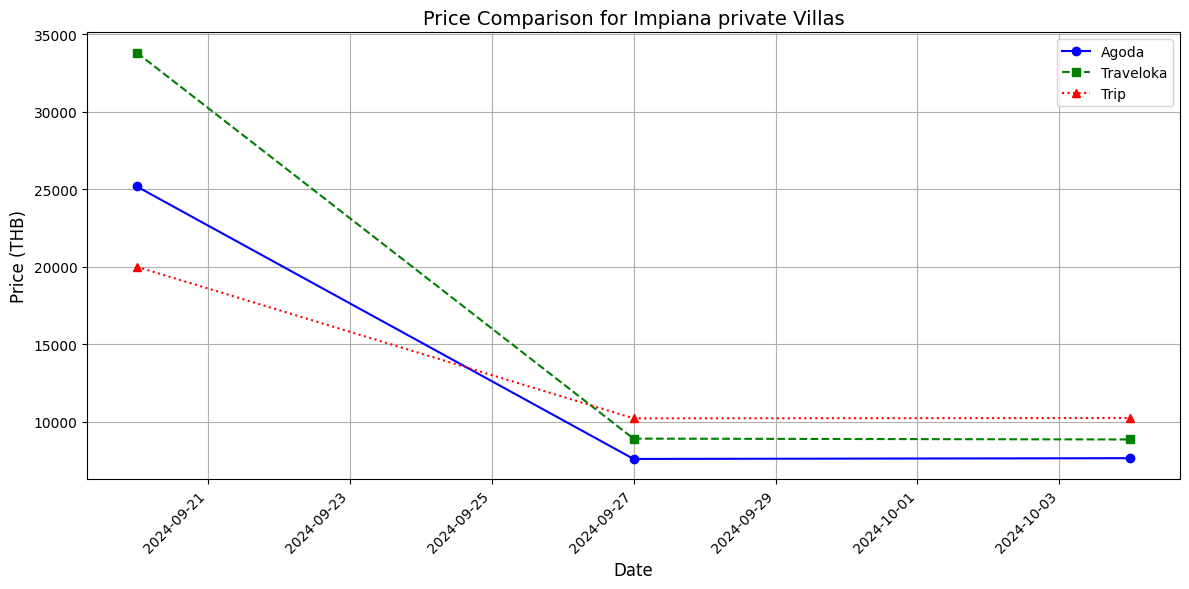

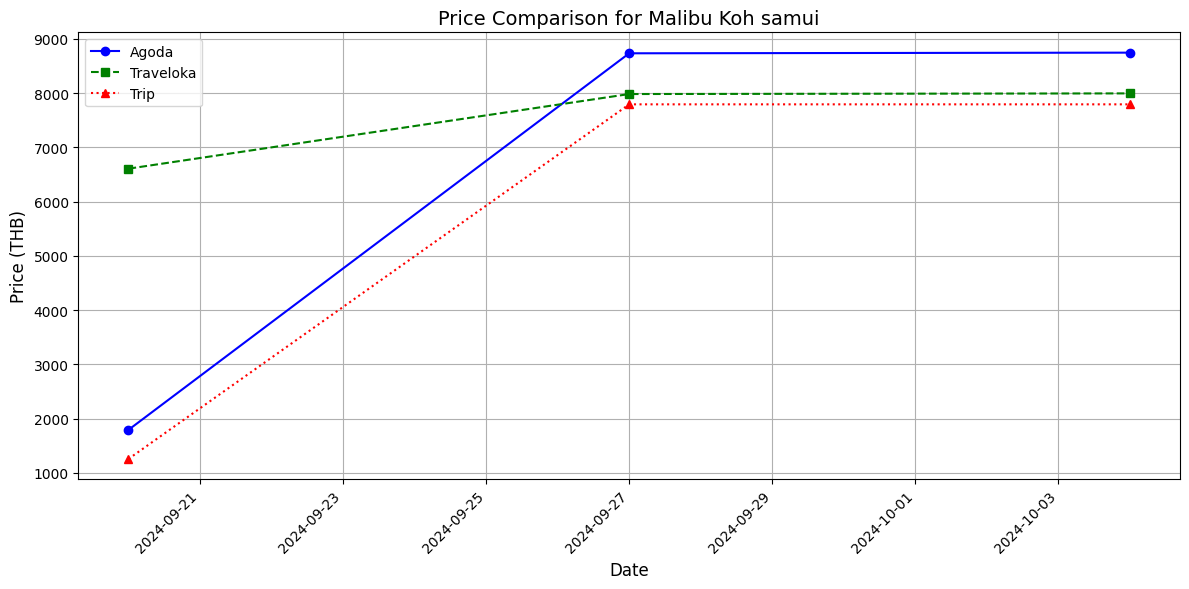

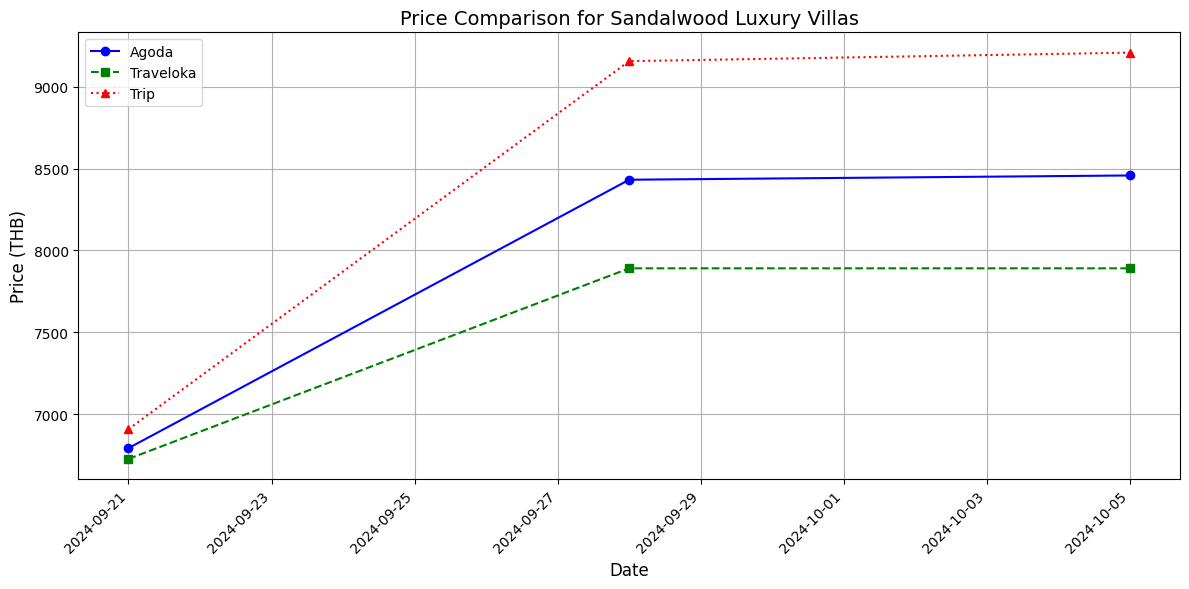

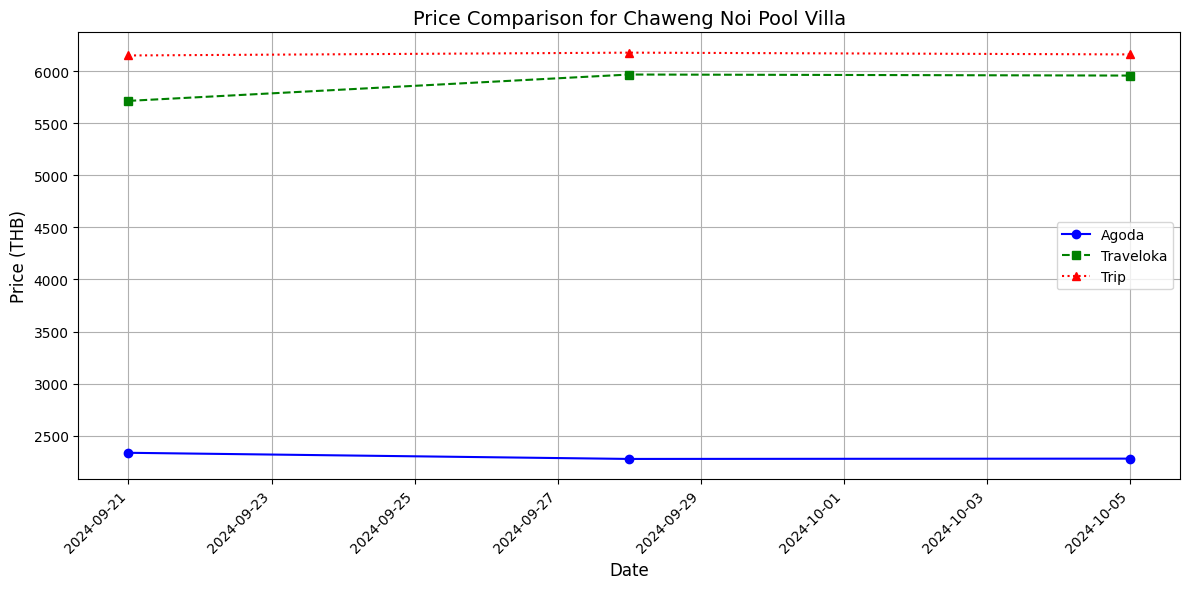

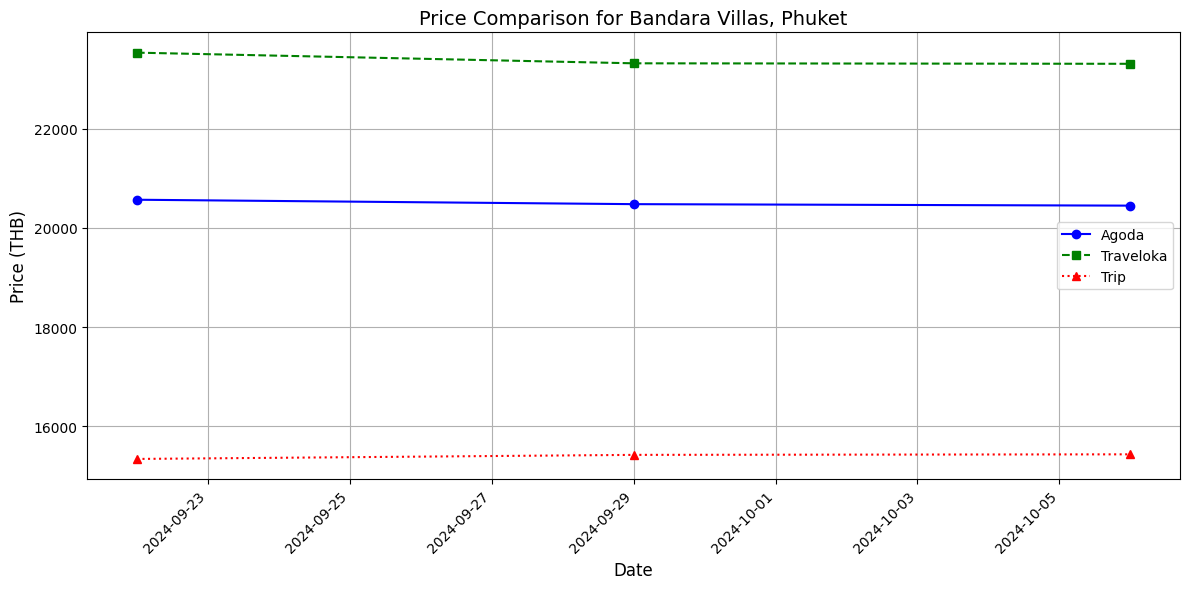

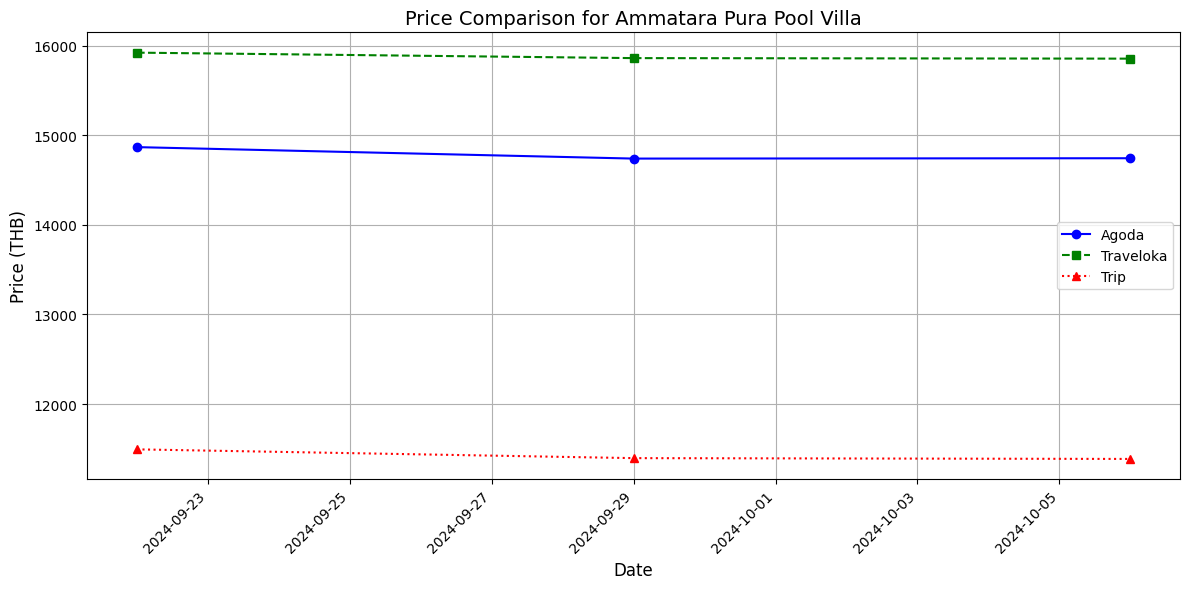

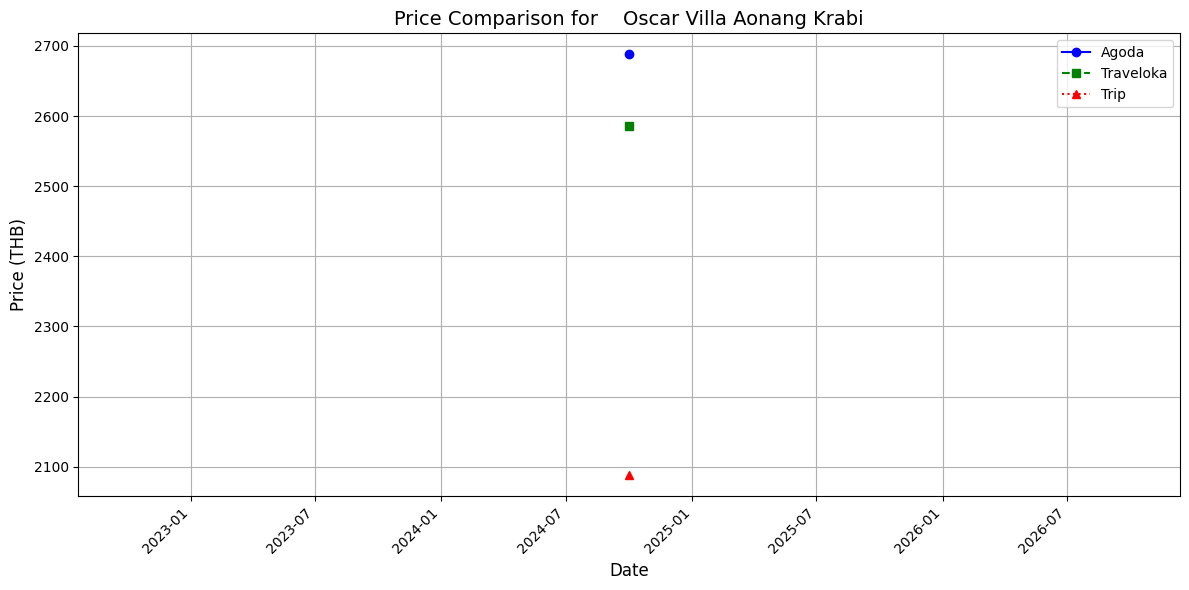

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# นำเข้าข้อมูลจากไฟล์
df = pd.read_excel('processed_villa_data_01.xlsx')

# แปลงคอลัมน์ที่จำเป็นให้เป็น datetime และ numeric
df['Search date'] = df['Search date'].apply(lambda x: x.replace(year=x.year - 543) if pd.notnull(x) else x)
df['Search date'] = pd.to_datetime(df['Search date'])
df['Agoda'] = pd.to_numeric(df['Agoda'], errors='coerce')
df['Traveloka'] = pd.to_numeric(df['Traveloka'], errors='coerce')
df['Trip'] = pd.to_numeric(df['Trip'], errors='coerce')

# Handle missing dates (choose one method)
# 1. Remove rows with missing dates:
# df = df.dropna(subset=['Search date'])
# 2. Impute missing dates with the mean date:
mean_date = pd.Timestamp(df['Search date'].mean())
df['Search date'] = df['Search date'].fillna(mean_date)

# สร้างกราฟเปรียบเทียบราคาในแต่ละสัปดาห์
for villa in df['Pool Villa Name'].unique():
    subset = df[df['Pool Villa Name'] == villa]

    # Create a figure with a specific size
    plt.figure(figsize=(12, 6))

    # Plot data with enhanced aesthetics
    plt.plot(subset['Search date'], subset['Agoda'], label='Agoda', linestyle='-', marker='o', color='blue')
    plt.plot(subset['Search date'], subset['Traveloka'], label='Traveloka', linestyle='--', marker='s', color='green')
    plt.plot(subset['Search date'], subset['Trip'], label='Trip', linestyle=':', marker='^', color='red')

    plt.title(f'Price Comparison for {villa}', fontsize=14)  # Increase title font size
    plt.xlabel('Date', fontsize=12)  # Increase label font size
    plt.ylabel('Price (THB)', fontsize=12)  # Increase label font size and specify currency
    plt.legend(fontsize=10)  # Increase legend font size

    plt.xticks(rotation=45, ha='right', fontsize=10)  # Increase tick font size
    plt.grid(True)  # Add gridlines

    plt.tight_layout()
    plt.show()
    # Optional: Save the plot to a file
    # plt.savefig(f'{villa}_price_comparison.png')

In [ ]:
print(subset.isna().sum())  # ตรวจสอบจำนวนค่า NaN ในแต่ละคอลัมน์

Search date        0
checkin date       0
Pool Villa Name    0
Agoda              0
Traveloka          0
Trip               0
dtype: int64


In [ ]:
print(subset.dtypes)  # ตรวจสอบประเภทข้อมูลของแต่ละคอลัมน์

Search date        datetime64[ns]
checkin date               object
Pool Villa Name            object
Agoda                       int64
Traveloka                   int64
Trip                        int64
dtype: object


In [ ]:
print(subset[['Search date', 'Agoda', 'Traveloka', 'Trip']])  # ตรวจสอบข้อมูลที่จำเป็น


   Search date  Agoda  Traveloka  Trip
31  2024-10-01   2688       2586  2088


In [ ]:
print(subset['Search date'].isna().sum())  # ตรวจสอบค่า NaT ในคอลัมน์วันที่


0
